In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#questions about importing from sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [2]:
df = pd.read_excel('census data.xlsx')


In [3]:
df["income"] = df["income"].map(lambda x: 1 if (x == ">50K") else 0)

In [4]:
X = df[[col for col in df.columns if col != 'income']]
y = df["income"]

In [5]:
X = pd.get_dummies(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [7]:
#random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
result = rf_model.predict(X_test)

In [8]:
print(accuracy_score(y_test,result))
print(precision_score(y_test,result))
print(recall_score(y_test,result))
print(f1_score(y_test,result))

0.8585320913092436
0.7267732267732268
0.6353711790393013
0.6780055917986952


<AxesSubplot:>

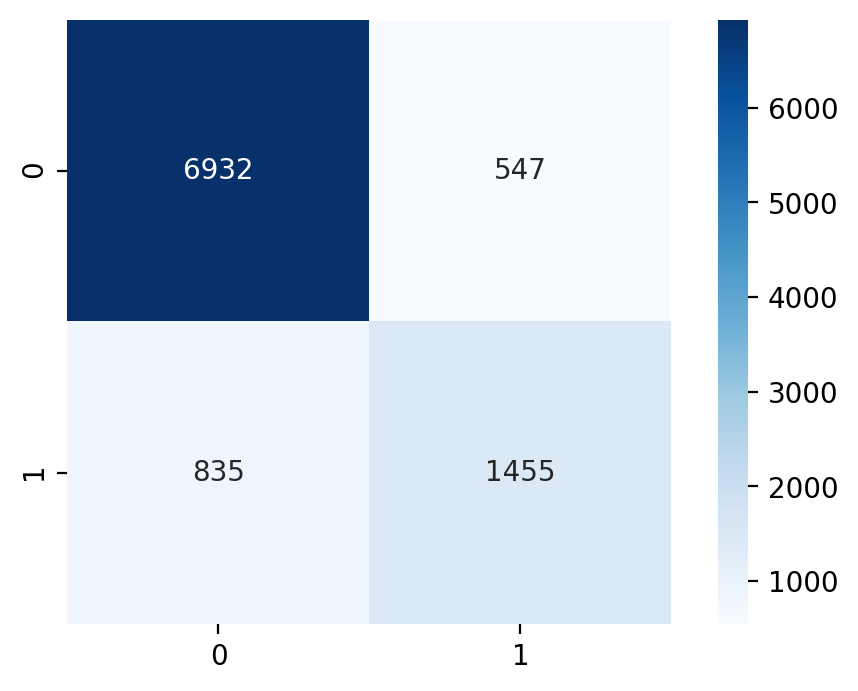

In [9]:
tc = confusion_matrix(y_test,result)
plt.figure(dpi=200)
sns.heatmap(tc, cmap=plt.cm.Blues, annot=True, square=True, fmt="d")

In [10]:
acc = []
recall = []
precision = []
f1 = []
n = 1

while n < 25:
    rf_model = RandomForestClassifier(max_depth =n)
    rf_model.fit(X_train, y_train)
    result = rf_model.predict(X_test)
    acc.append(accuracy_score(y_test,result))
    precision.append(precision_score(y_test,result))
    recall.append(recall_score(y_test,result))
    f1.append(f1_score(y_test,result))
    print(n)
    n = n + 1

/Users/matthew.redmond@usfoods.com/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


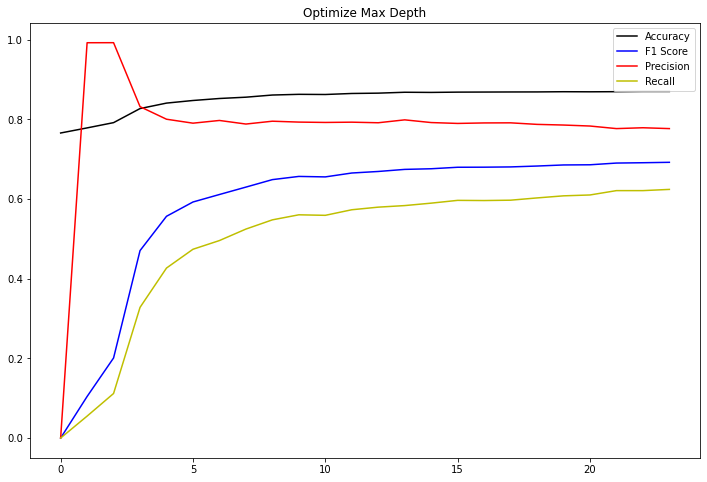

In [11]:
#Took some of this code from Lew's office hour
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(acc, color = 'black', label = 'Accuracy')
ax.plot(f1[-len(acc):], color = 'b', label = 'F1 Score')
ax.plot(precision[-len(acc):], color = 'r', label = 'Precision')
ax.plot(recall[-len(acc):], color = 'y', label = 'Recall')
ax.set_title ("Optimize Max Depth")
ax.legend();
ax.axvline(x=10, ymin=1, color = 'r', ls = ':')

In [12]:
print(acc)
print(precision)
print(recall)
print(f1)

[0.7655850138192241, 0.7783805916675197, 0.7915856280069608, 0.8269014228682567, 0.8406182823216296, 0.847169618179957, 0.8521854846964889, 0.8554611526256526, 0.8608864776333299, 0.8626266762206981, 0.8622172177295526, 0.8647763332992118, 0.8655952502815027, 0.8678472719828028, 0.8674378134916573, 0.8681543658511618, 0.8683590950967346, 0.8685638243423073, 0.8686661889650936, 0.8691780120790255, 0.8689732828334528, 0.8692803767018119, 0.8697921998157436, 0.8697921998157436]
[0.0, 0.9921259842519685, 0.9922480620155039, 0.831672203765227, 0.8001638001638002, 0.7902403495994174, 0.7970505617977528, 0.7880577427821522, 0.7951807228915663, 0.7929542645241038, 0.7920792079207921, 0.7927492447129909, 0.791293977340489, 0.7985654512851166, 0.7917888563049853, 0.7895953757225433, 0.790845886442642, 0.7910879629629629, 0.7872219053051911, 0.7855530474040632, 0.7830717488789237, 0.7766247951938832, 0.778751369112815, 0.7766304347826087]
[0.0, 0.05502183406113537, 0.11179039301310044, 0.32794759